In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Handling Null Values

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [29]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [27]:
df.drop('car_ID',axis=1,inplace=True)

In [30]:
df.drop('CarName',axis=1,inplace=True)

### Split into cat and con

In [16]:
df.dtypes.value_counts()

object     10
int64       8
float64     8
Name: count, dtype: int64

In [17]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index

print(cat_cols)
print(num_cols)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


### EDA
#### Univariate Analysis-Cat Feat

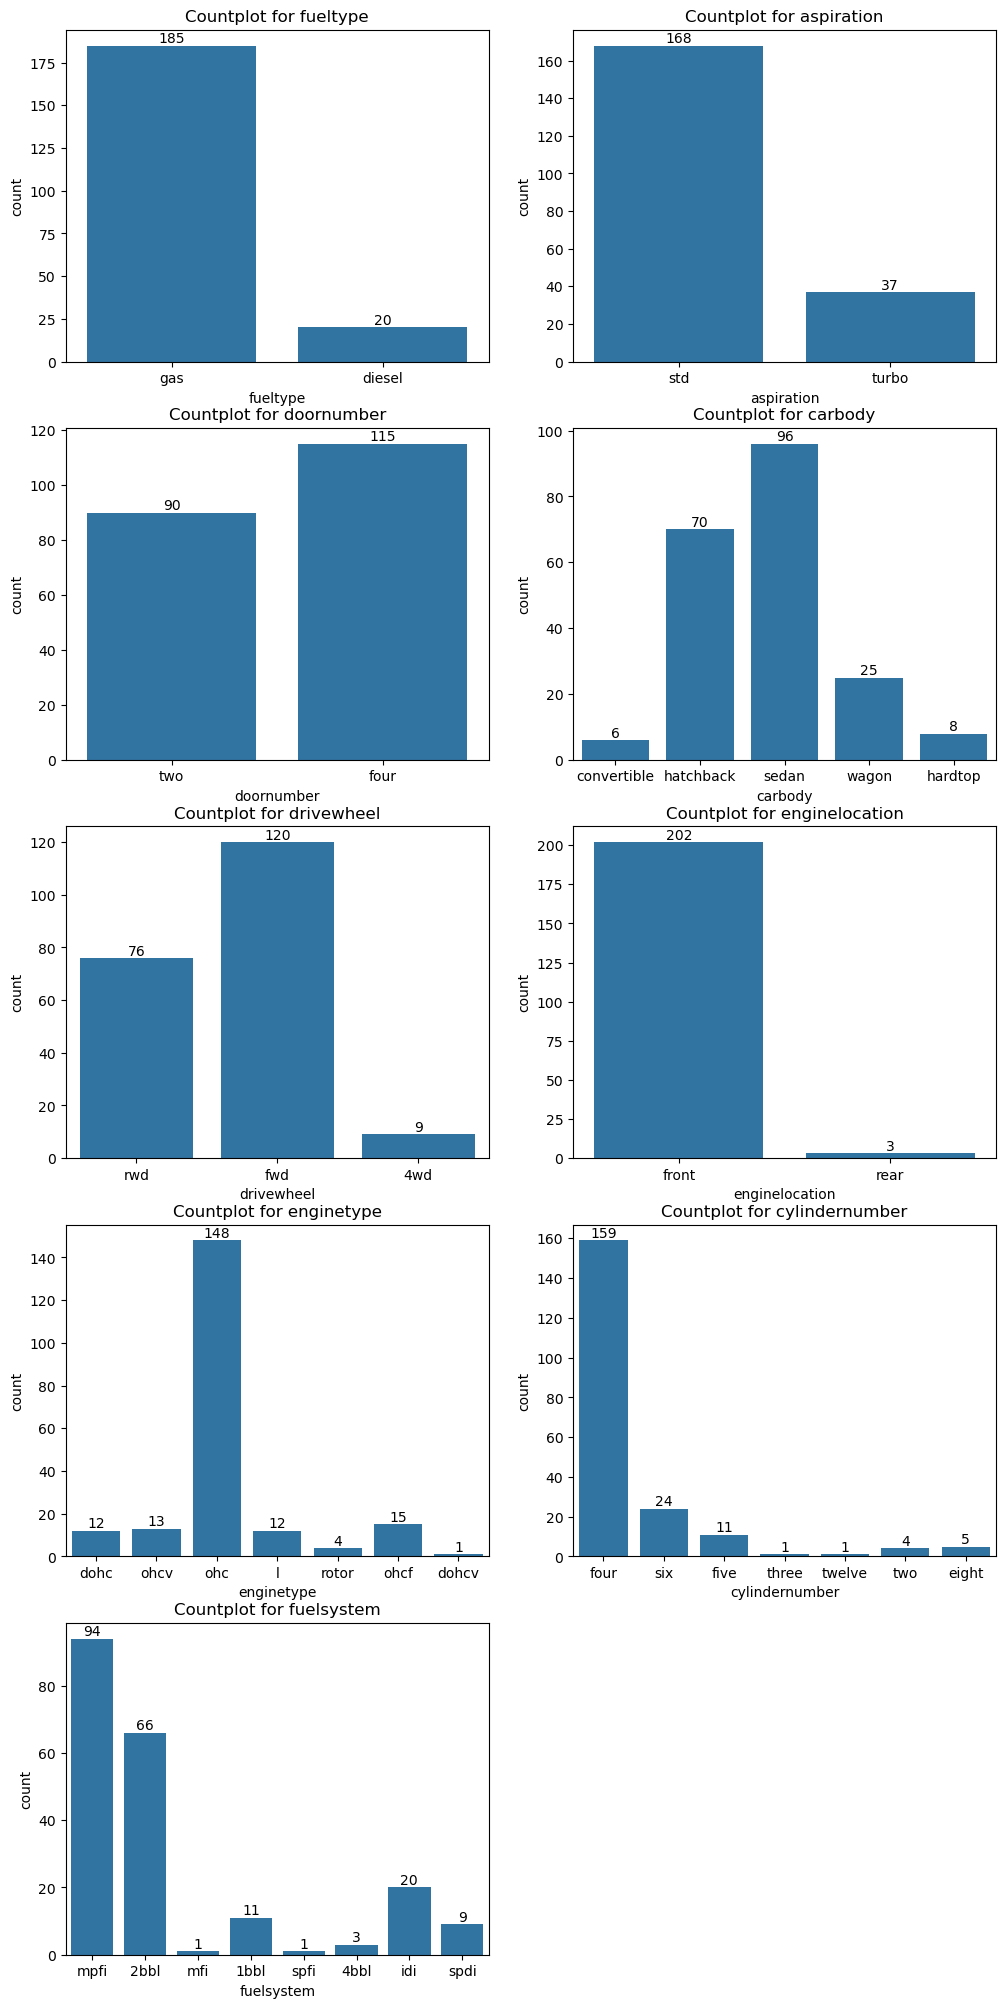

In [33]:
cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
plt.figure(figsize=(12,25))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
Fuel type, engine location can be dropped before modeling

In [46]:
df.drop(['fueltype','enginelocation'],axis=1,inplace=True)

In [45]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Univariate Analysis - Cont Data

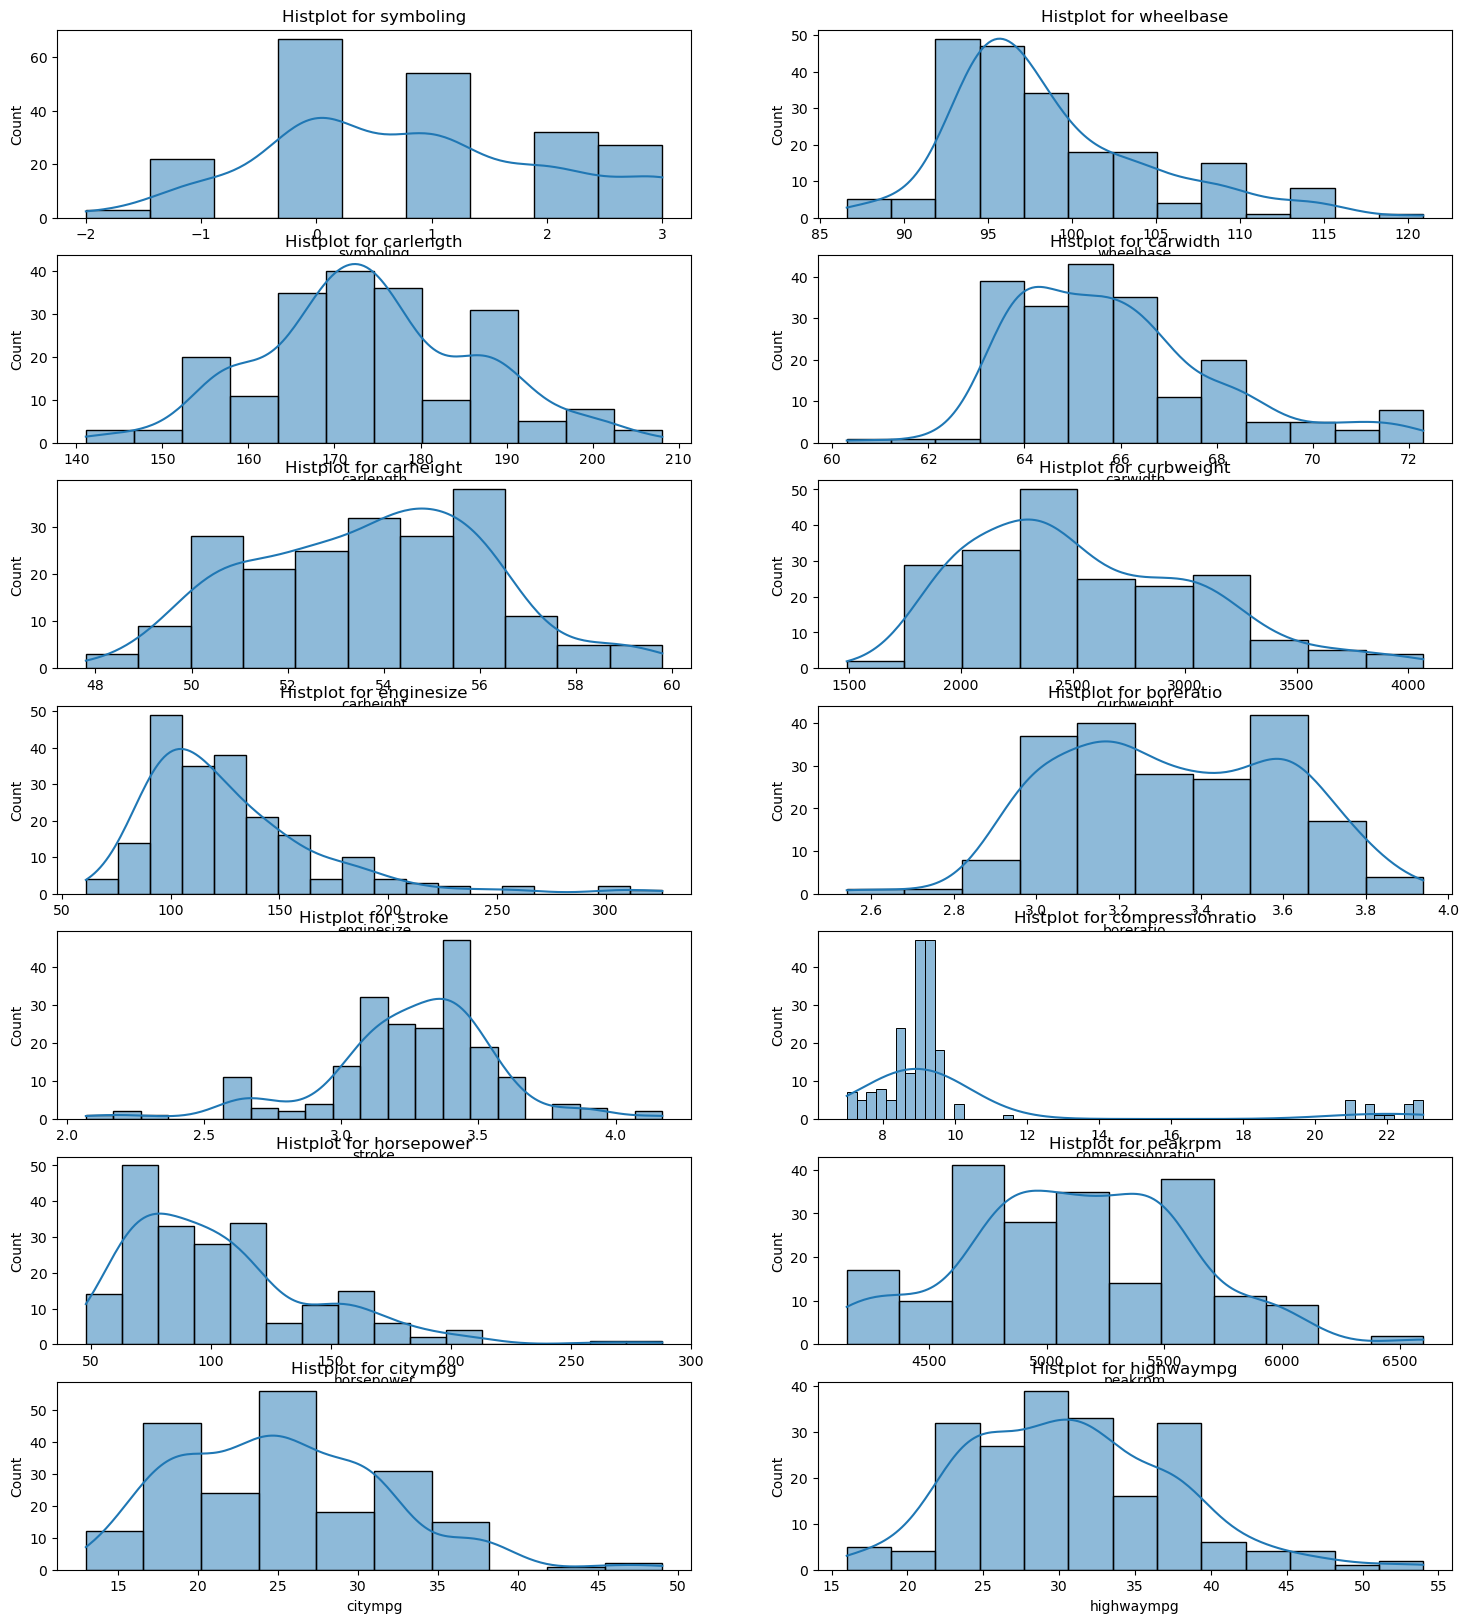

In [36]:
cols =  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']

plt.figure(figsize=(18,20))
for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')
plt.show()

### Bi-Variate Analysis
#### Cont- Cont

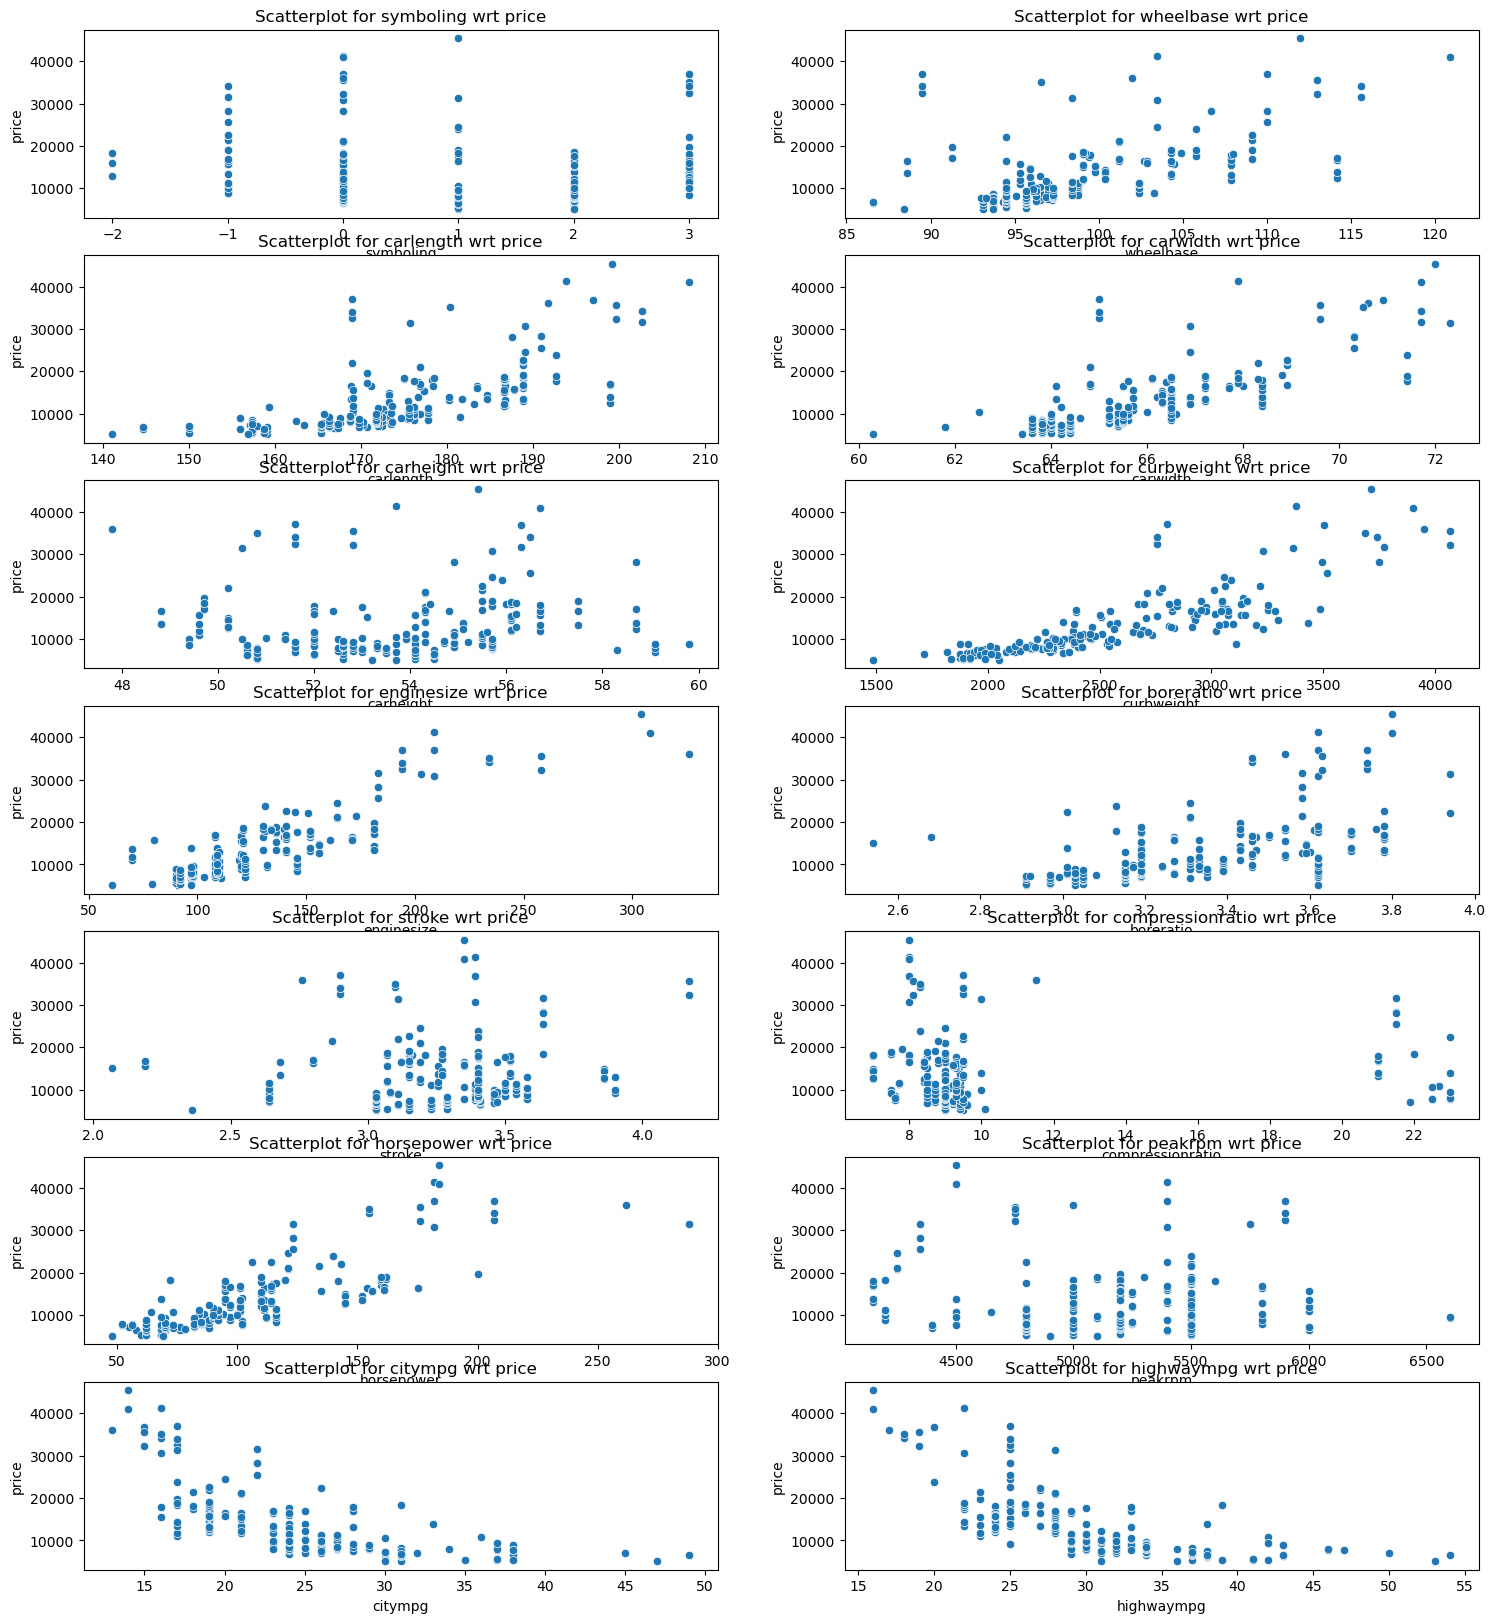

In [39]:
cols =  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']

plt.figure(figsize=(18,20))
for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.scatterplot(x=df[cols[i]],y=df['price'])
    plt.title(f'Scatterplot for {cols[i]} wrt price')
plt.show()


### Bi-Variate
#### Cat - cont data

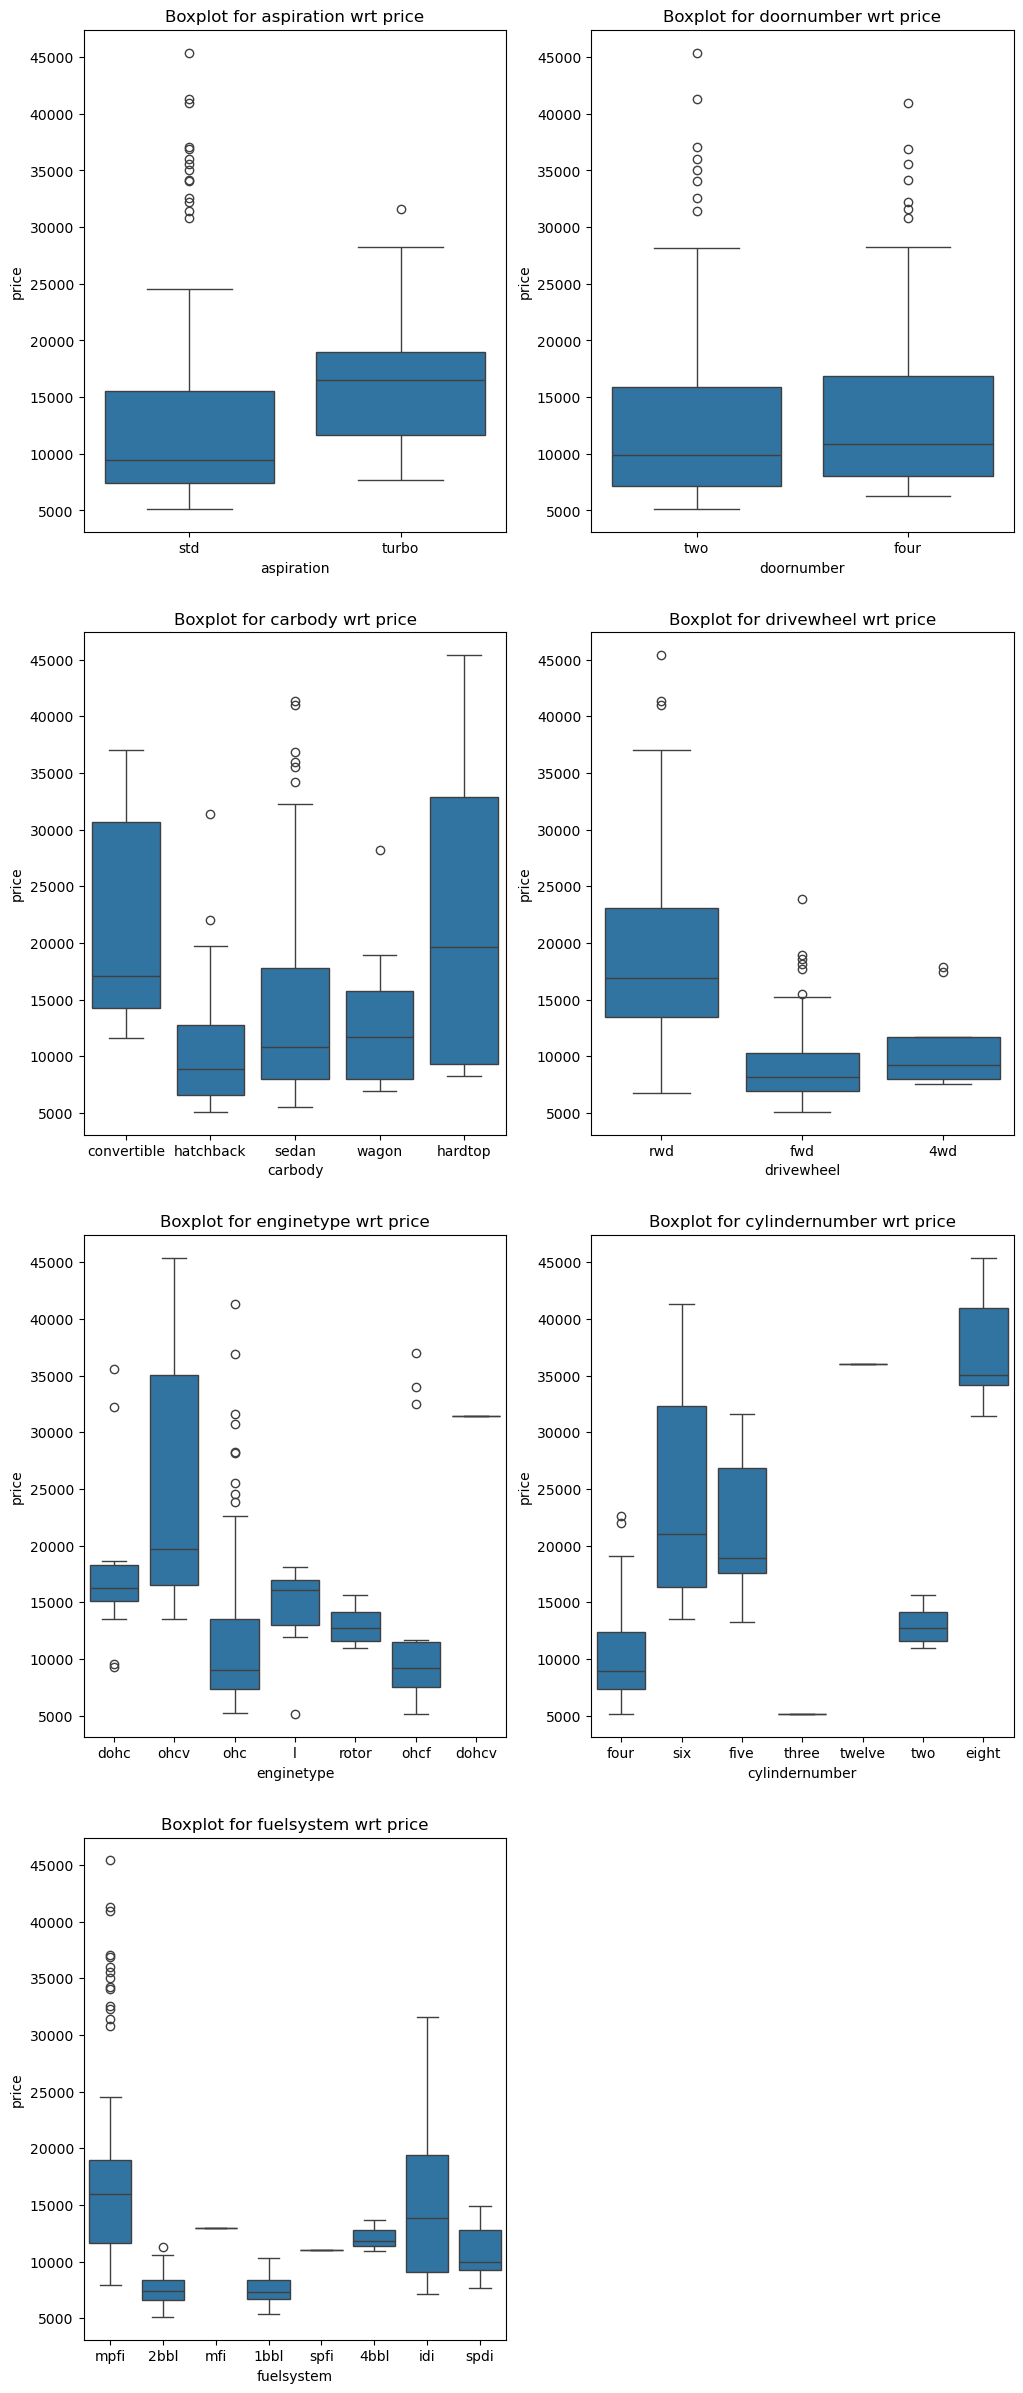

In [48]:
cols = ['aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem']
plt.figure(figsize=(12,30))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['price'])
    plt.title(f'Boxplot for {cols[i]} wrt price')
plt.show()

In [41]:
cat_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [49]:
cat_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [50]:
df.shape

(205, 22)

### Corr among Num features


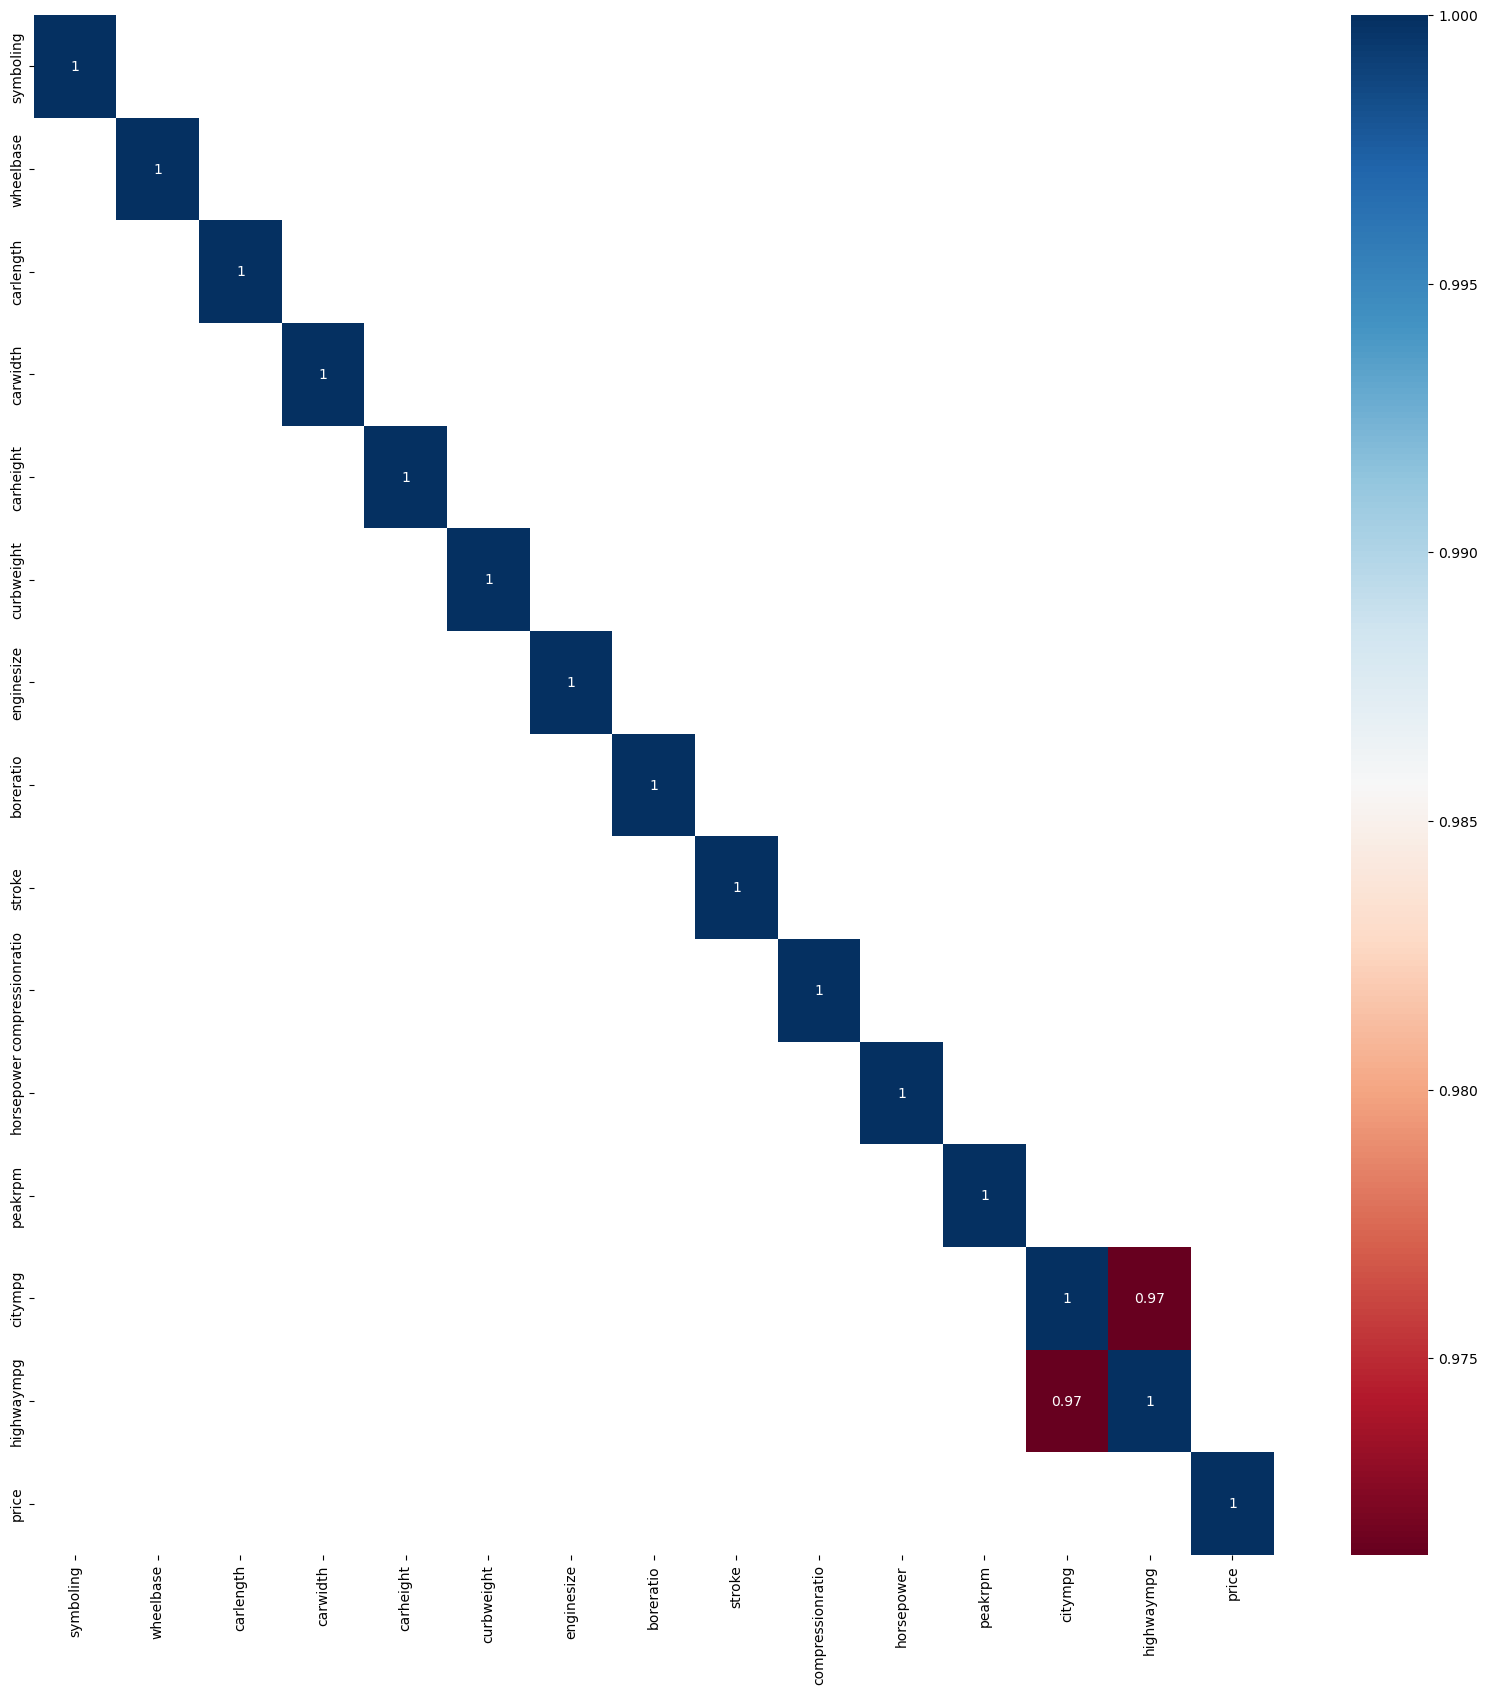

In [53]:
corr = df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.9],annot=True,cmap='RdBu')
plt.show()

### We can see there is a high correlation between highway mpg and citympg , so one of them can be dropped before model building

In [55]:
df.drop('highwaympg',axis=1,inplace=True)

In [56]:
df.shape

(205, 21)

In [57]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index

print(cat_cols)
print(num_cols)

Index(['aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')


### Outlier Treatment

In [58]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
symboling,-2.00,-1.9600,-1.000,-1.00,1.00,3.00,3.0000,3.000,3.00
wheelbase,86.60,88.4080,88.672,93.02,97.00,110.00,114.2000,115.544,120.90
carlength,141.10,144.8160,150.000,157.14,173.20,196.36,199.5680,202.480,208.10
carwidth,60.30,62.5360,63.600,63.60,65.50,70.46,71.6760,71.700,72.30
carheight,47.80,48.8240,49.416,49.70,54.10,57.50,59.0680,59.100,59.80
curbweight,1488.00,1819.7200,1874.000,1901.00,2414.00,3503.00,3768.4000,3948.000,4066.00
enginesize,61.00,70.0000,79.080,90.00,120.00,201.20,256.0800,302.160,326.00
boreratio,2.54,2.9100,2.910,2.97,3.31,3.78,3.7800,3.800,3.94
stroke,2.07,2.1968,2.640,2.64,3.29,3.64,3.8968,3.900,4.17
compressionratio,7.00,7.0000,7.000,7.50,9.00,21.82,22.9760,23.000,23.00


In [83]:
outlier_counts = {}

for col in num_cols:
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile

    outliers_below = df[col] < lower_bound
    outliers_above = df[col] > upper_bound
    total_outliers = outliers_below.sum() + outliers_above.sum()


    outlier_counts[col] = total_outliers

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")
    print(f"{col}: {count} outliers_below")
    print(f"{col}: {count} outliers_above")

symboling: 3 outliers
symboling: 3 outliers_below
symboling: 3 outliers_above
wheelbase: 6 outliers
wheelbase: 6 outliers_below
wheelbase: 6 outliers_above
carlength: 6 outliers
carlength: 6 outliers_below
carlength: 6 outliers_above
carwidth: 3 outliers
carwidth: 3 outliers_below
carwidth: 3 outliers_above
carheight: 3 outliers
carheight: 3 outliers_below
carheight: 3 outliers_above
curbweight: 6 outliers
curbweight: 6 outliers_below
curbweight: 6 outliers_above
enginesize: 3 outliers
enginesize: 3 outliers_below
enginesize: 3 outliers_above
boreratio: 0 outliers
boreratio: 0 outliers_below
boreratio: 0 outliers_above
stroke: 3 outliers
stroke: 3 outliers_below
stroke: 3 outliers_above
compressionratio: 0 outliers
compressionratio: 0 outliers_below
compressionratio: 0 outliers_above
horsepower: 3 outliers
horsepower: 3 outliers_below
horsepower: 3 outliers_above
peakrpm: 0 outliers
peakrpm: 0 outliers_below
peakrpm: 0 outliers_above
citympg: 6 outliers
citympg: 6 outliers_below
citymp

In [73]:
for i in num_cols:
    upper = df[i].quantile(0.99)
    print(i,upper,'Count of outliers: ',df[df[i]>upper].shape[0])

symboling 3.0 Count of outliers:  0
wheelbase 115.54400000000001 Count of outliers:  3
carlength 202.48000000000002 Count of outliers:  3
carwidth 71.7 Count of outliers:  2
carheight 59.1 Count of outliers:  2
curbweight 3948.0000000000005 Count of outliers:  3
enginesize 302.16000000000037 Count of outliers:  3
boreratio 3.8 Count of outliers:  2
stroke 3.9 Count of outliers:  2
compressionratio 23.0 Count of outliers:  0
horsepower 207.0 Count of outliers:  2
peakrpm 6000.0 Count of outliers:  2
citympg 44.720000000000056 Count of outliers:  3
price 40802.72000000003 Count of outliers:  3


In [77]:
num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

In [78]:
df1 = df.copy()

In [80]:
cols_right_Sk = ['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'citympg', 'price']
for i in cols_right_Sk:
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [76]:
for i in num_cols:
    lower = df[i].quantile(0.01)
    print(i,upper,'Count of outliers: ',df[df[i]<lower].shape[0])

symboling 40802.72000000003 Count of outliers:  3
wheelbase 40802.72000000003 Count of outliers:  3
carlength 40802.72000000003 Count of outliers:  3
carwidth 40802.72000000003 Count of outliers:  3
carheight 40802.72000000003 Count of outliers:  3
curbweight 40802.72000000003 Count of outliers:  3
enginesize 40802.72000000003 Count of outliers:  1
boreratio 40802.72000000003 Count of outliers:  2
stroke 40802.72000000003 Count of outliers:  3
compressionratio 40802.72000000003 Count of outliers:  0
horsepower 40802.72000000003 Count of outliers:  3
peakrpm 40802.72000000003 Count of outliers:  0
citympg 40802.72000000003 Count of outliers:  3
price 40802.72000000003 Count of outliers:  3


In [81]:
cols_left_Sk = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'citympg', 'price']
for i in cols_left_Sk:
    lower = df[i].quantile(0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [82]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
symboling,-1.9600,-1.921600,-1.000,-1.00,1.00,3.00,3.0000,3.00000,3.000
wheelbase,88.4080,88.415680,88.672,93.02,97.00,110.00,114.2000,115.49024,115.544
carlength,144.8160,145.023360,150.000,157.14,173.20,196.36,199.5680,202.36480,202.480
carwidth,62.5360,62.570560,63.600,63.60,65.50,70.46,71.6760,71.70000,71.700
carheight,48.8240,48.847040,49.416,49.70,54.10,57.50,59.0680,59.10000,59.100
curbweight,1819.7200,1820.411200,1874.000,1901.00,2414.00,3503.00,3768.4000,3946.08000,3948.000
enginesize,70.0000,70.000000,79.080,90.00,120.00,201.20,256.0800,300.39360,302.160
boreratio,2.9100,2.910000,2.910,2.97,3.31,3.78,3.7800,3.80000,3.800
stroke,2.1968,2.203328,2.640,2.64,3.29,3.64,3.8968,3.90000,3.900
compressionratio,7.0000,7.000000,7.000,7.50,9.00,21.82,22.9760,23.00000,23.000


### Encoding

In [87]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [88]:
for i in cat_cols:
    print(i,df[i].nunique())

aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginetype 7
cylindernumber 7
fuelsystem 8


In [89]:
df_dummies = pd.get_dummies(data=df,columns=cat_cols,drop_first=True,dtype=int)
print(df_dummies.shape)

(205, 41)


In [91]:
df_dummies.dtypes.value_counts()

int32      27
float64    14
Name: count, dtype: int64

### Shapiro

In [93]:
from scipy.stats import shapiro

In [94]:
test_stat1,p1 = shapiro(df_dummies['price'])
print('test_stat1',test_stat1,'p',p1)
test_stat2,p2 = shapiro(np.log(df_dummies['price']))
print('test_stat1',test_stat2,'p',p2)

test_stat1 0.802978824547699 p 2.2915087885605626e-15
test_stat1 0.9472459553212176 p 7.84231064388067e-07


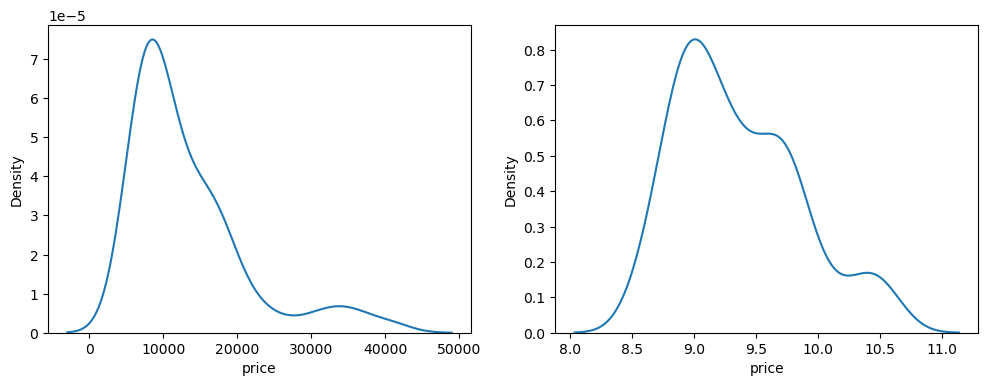

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['price'])  # Right skewed
plt.subplot(1,2,2)
sns.kdeplot(np.log(df['price'])) # Close towards normal dist
plt.show()

In [97]:
x = df_dummies.drop(['price'],axis=1)
y = np.log(df_dummies['price'])
print(x.shape)
print(y.shape)

(205, 40)
(205,)


In [96]:
df.columns

Index(['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'price'],
      dtype='object')

In [98]:
x.dtypes.value_counts()

int32      27
float64    13
Name: count, dtype: int64

### VIF

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
26,enginetype_rotor,inf
32,cylindernumber_two,inf
3,carwidth,6155.924824
1,wheelbase,3948.037279
2,carlength,3166.314758
7,boreratio,1929.634309
4,carheight,1564.789867
9,compressionratio,1292.461993
5,curbweight,868.575430
6,enginesize,536.135972


In [103]:
cols_with_high_vif = vif['Feature'][vif['VIF']==np.inf].values
print(cols_with_high_vif)

['enginetype_rotor' 'cylindernumber_two']


In [104]:
x = x.drop(cols_with_high_vif,axis=1)
print(x.shape)

(205, 38)


In [105]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif.head(20)

,Feature,VIF
3,carwidth,6148.113340
1,wheelbase,3934.169757
2,carlength,3113.028921
4,carheight,1548.631253
9,compressionratio,1289.185775
7,boreratio,1266.641916
5,curbweight,839.734288
11,peakrpm,412.293552
8,stroke,329.027474
6,enginesize,259.937974


In [106]:
thresh = 900
cols_with_high_vif1 = vif['Feature'][vif['VIF']>thresh].values
print(cols_with_high_vif1)

['carwidth' 'wheelbase' 'carlength' 'carheight' 'compressionratio'
 'boreratio']


In [107]:
x = x.drop(cols_with_high_vif1,axis=1)
print(x.shape)

(205, 32)


### OLS

In [109]:
import statsmodels.api as sm

In [110]:
x1 = x.copy()
y1 = y.copy()

In [111]:
x1 = sm.add_constant(x1)   # used to fetch the c value
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     76.06
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.27e-85
Time:                        12:30:03   Log-Likelihood:                 129.49
No. Observations:                 205   AIC:                            -193.0
Df Residuals:                     172   BIC:                            -83.32
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.6399      0.418     20.675      0.000       7.815       9.465
symboling                 0.0118      0.013      0.918      0.360      -0.014       0.037
curbweight                0.0004   8.93e-05      3.974      0.000       0.000       0.001
enginesize                0.0024      0.001      2.265      0.025       0.000       0.005
stroke                   -0.2154      0.054     -3.980      0.000      -0.322      -0.109
horsepower                0.0039      0.001      3.353      0.001       0.002       0.006
peakrpm                6.285e-05   3.77e-05      1.665      0.098   -1.17e-05       0.000
citympg                  -0.0083      0.005     -1.830      0.069      -0.017       0.001
aspiration_turbo          0.0206      0.049      0.423      0.673      -0.075       0.116
doornumber_two           -0.0355      0.036     -0.979      0.329      -0.107       0.036
carbody_hardtop          -0.2348      0.081     -2.905      0.004      -0.394      -0.075
carbody_hatchback        -0.2306      0.067     -3.438      0.001      -0.363      -0.098
carbody_sedan            -0.1701      0.071     -2.396      0.018      -0.310      -0.030
carbody_wagon            -0.2556      0.080     -3.205      0.002      -0.413      -0.098
drivewheel_fwd            0.0292      0.060      0.491      0.624      -0.088       0.147
drivewheel_rwd            0.0741      0.067      1.111      0.268      -0.058       0.206
enginetype_dohcv         -0.1912      0.173     -1.108      0.270      -0.532       0.150
enginetype_l              0.1035      0.073      1.409      0.161      -0.041       0.248
enginetype_ohc            0.2483      0.050      4.969      0.000       0.150       0.347
enginetype_ohcf           0.1029      0.074      1.399      0.164      -0.042       0.248
enginetype_ohcv          -0.1874      0.068     -2.766      0.006      -0.321      -0.054
cylindernumber_five      -0.2661      0.105     -2.531      0.012      -0.474      -0.059
cylindernumber_four      -0.4046      0.098     -4.118      0.000      -0.599      -0.211
cylindernumber_six       -0.2283      0.081     -2.828      0.005      -0.388      -0.069
cylindernumber_three     -0.2381      0.200     -1.192      0.235      -0.632       0.156
cylindernumber_twelve    -0.4162      0.172     -2.420      0.017      -0.756      -0.077
fuelsystem_2bbl          -0.0560      0.054     -1.040      0.300      -0.162       0.050
fuelsystem_4bbl          -0.0327      0.152     -0.215      0.830      -0.332       0.267
fuelsystem_idi            0.2293      0.081      2.829      0.005       0.069       0.389
fuelsystem_mfi           -0.0996      0.160     -0.622      0.535      -0.415       0.216
fuelsystem_mpfi           0.0294      0.061      0.485      0.628      -0.090       0.149
fuelsystem_spdi        

In [112]:
print('R2',ols_m1.rsquared)
print('Adj_R2',ols_m1.rsquared_adj)

R2 0.9339994442049065
Adj_R2 0.9217202710337263


In [113]:
ols_m1.pvalues

const                    1.677034e-48
symboling                3.598341e-01
curbweight               1.038223e-04
enginesize               2.479086e-02
stroke                   1.015352e-04
horsepower               9.818341e-04
peakrpm                  9.771223e-02
citympg                  6.896415e-02
aspiration_turbo         6.725115e-01
doornumber_two           3.287452e-01
carbody_hardtop          4.152108e-03
carbody_hatchback        7.358057e-04
carbody_sedan            1.765487e-02
carbody_wagon            1.607589e-03
drivewheel_fwd           6.240110e-01
drivewheel_rwd           2.682139e-01
enginetype_dohcv         2.695863e-01
enginetype_l             1.606191e-01
enginetype_ohc           1.612083e-06
enginetype_ohcf          1.636443e-01
enginetype_ohcv          6.298289e-03
cylindernumber_five      1.227478e-02
cylindernumber_four      5.927788e-05
cylindernumber_six       5.244832e-03
cylindernumber_three     2.347198e-01
cylindernumber_twelve    1.654469e-02
fuelsystem_2

In [117]:
thresh  = 0.6
features_with_high_p1 = ols_m1.pvalues[ols_m1.pvalues>thresh].index
print(features_with_high_p1)

Index(['aspiration_turbo', 'drivewheel_fwd', 'fuelsystem_4bbl',
       'fuelsystem_mpfi', 'fuelsystem_spfi'],
      dtype='object')


In [118]:
x2 = x.drop(features_with_high_p1,axis=1)
y2 = y.copy()
print(x2.shape)
print(y2.shape)

(205, 27)
(205,)


### OLS - M2

In [120]:
x3 = x2.copy()
y3 = y2.copy()

In [121]:
x3 = sm.add_constant(x3)       # used to fetch the c value
ols_m2 = sm.OLS(y3,x3).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     92.26
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           7.19e-90
Time:                        13:01:05   Log-Likelihood:                 128.97
No. Observations:                 205   AIC:                            -201.9
Df Residuals:                     177   BIC:                            -108.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.7248      0.369     23.614      0.000       7.996       9.454
symboling                 0.0114      0.012      0.931      0.353      -0.013       0.036
curbweight                0.0003    8.3e-05      4.106      0.000       0.000       0.001
enginesize                0.0025      0.001      2.910      0.004       0.001       0.004
stroke                   -0.2245      0.051     -4.399      0.000      -0.325      -0.124
horsepower                0.0045      0.001      5.036      0.000       0.003       0.006
peakrpm                5.394e-05    3.3e-05      1.632      0.104   -1.13e-05       0.000
citympg                  -0.0083      0.004     -1.915      0.057      -0.017       0.000
doornumber_two           -0.0354      0.035     -1.002      0.318      -0.105       0.034
carbody_hardtop          -0.2392      0.079     -3.012      0.003      -0.396      -0.083
carbody_hatchback        -0.2354      0.066     -3.581      0.000      -0.365      -0.106
carbody_sedan            -0.1705      0.070     -2.446      0.015      -0.308      -0.033
carbody_wagon            -0.2561      0.079     -3.258      0.001      -0.411      -0.101
drivewheel_rwd            0.0416      0.036      1.143      0.255      -0.030       0.113
enginetype_dohcv         -0.1925      0.163     -1.181      0.239      -0.514       0.129
enginetype_l              0.1135      0.071      1.608      0.110      -0.026       0.253
enginetype_ohc            0.2494      0.049      5.096      0.000       0.153       0.346
enginetype_ohcf           0.0847      0.069      1.234      0.219      -0.051       0.220
enginetype_ohcv          -0.1819      0.065     -2.792      0.006      -0.310      -0.053
cylindernumber_five      -0.2387      0.085     -2.818      0.005      -0.406      -0.072
cylindernumber_four      -0.3751      0.073     -5.105      0.000      -0.520      -0.230
cylindernumber_six       -0.2159      0.066     -3.278      0.001      -0.346      -0.086
cylindernumber_three     -0.2081      0.187     -1.114      0.267      -0.577       0.161
cylindernumber_twelve    -0.4318      0.169     -2.553      0.012      -0.766      -0.098
fuelsystem_2bbl          -0.0750      0.031     -2.399      0.018      -0.137      -0.013
fuelsystem_idi            0.2245      0.060      3.756      0.000       0.107       0.342
fuelsystem_mfi           -0.1171      0.147     -0.795      0.428      -0.408       0.174
fuelsystem_spdi          -0.1374      0.056     -2.438      0.016      -0.249      -0.026
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.538
Skew:                           0.203   Prob(JB):       

In [122]:
print('OLS_M1')
print('R2',ols_m1.rsquared)
print('Adj_R2',ols_m1.rsquared_adj)
print('OLS_M2')
print('R2',ols_m2.rsquared)
print('Adj_R2',ols_m2.rsquared_adj)

OLS_M1
R2 0.9339994442049065
Adj_R2 0.9217202710337263
OLS_M2
R2 0.9336618454754287
Adj_R2 0.9235424659716805


### Inference
1) Features(features_with_high_p1) dropped were insignificant  as Adj_R2 for OLS_M2 > Adj_R2 for Ols_M1

### Linear Regression

In [125]:
from sklearn.metrics import *

In [126]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_absolute_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae,'MSE',mse,'RMSE',rmse,'R2_Score',r2)

In [127]:
x3.head()

,const,symboling,curbweight,enginesize,stroke,horsepower,peakrpm,citympg,doornumber_two,carbody_hardtop,...,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spdi
0,1.0,3.0,2548.0,130.0,2.68,111.0,5000.0,21.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,3.0,2548.0,130.0,2.68,111.0,5000.0,21.0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,2823.0,152.0,3.47,154.0,5000.0,19.0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,1.0,2.0,2337.0,109.0,3.40,102.0,5500.0,24.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,2.0,2824.0,136.0,3.40,115.0,5500.0,18.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [128]:
x = x3.iloc[:,1:].copy()
y = y3.copy()
print(x.shape)
print(y.shape)

(205, 27)
(205,)


#### Split data into train and test  (train:test = 70: 30)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
print(205*0.30)

61.5


In [131]:
print(205-61.5)

143.5


In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(143, 27) (62, 27)
(143,) (62,)


In [133]:
x_test.head()

,symboling,curbweight,enginesize,stroke,horsepower,peakrpm,citympg,doornumber_two,carbody_hardtop,carbody_hatchback,...,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spdi
15,0.0,3230.0,209.0,3.39,182.0,5400.0,16.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.0,3053.0,131.0,3.40,160.0,5500.0,16.0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
100,0.0,2302.0,120.0,3.47,97.0,5200.0,27.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
132,3.0,2658.0,121.0,3.07,110.0,5250.0,21.0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
68,-1.0,3750.0,183.0,3.64,123.0,4350.0,22.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Regression Models

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [135]:
lr1 = LinearRegression()   # Lienar Reg model instance
lr1.fit(x_train,y_train)   # model training

LinearRegression()

In [136]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.1184632707141241 MSE 0.1184632707141241 RMSE 0.34418493679143497 R2_Score 0.9073988189944319


In [137]:
print('Train score',lr1.score(x_train,y_train))  # Train R2 Score
print('Test score',lr1.score(x_test,y_test))     # Test R2 score

Train score 0.9380497082681233
Test score 0.9073988189944319


In [138]:
m  = lr1.coef_
c = lr1.intercept_
print('Coef',m)
print('Intercept',c)

Coef [ 6.23648473e-03  3.76128958e-04  2.16607419e-03 -2.35315418e-01
  4.28431498e-03  6.14538366e-05 -1.24676451e-02 -2.59966739e-02
 -1.43141007e-01 -2.20348430e-01 -1.67184709e-01 -2.85841077e-01
  8.20963903e-03 -2.40450927e-01  1.05029170e-01  2.41630059e-01
  5.79817994e-02 -2.15808680e-01 -2.24868164e-01 -3.87653594e-01
 -2.35373990e-01 -2.77555756e-16 -4.41743579e-01 -8.57868972e-02
  2.26704364e-01  0.00000000e+00 -1.68390210e-01]
Intercept 8.824734028046445


### Model is overfit

#### For minimizing the overfitness of the model, we will apply lasso (L2 regularization)

In [140]:
las1 = Lasso(alpha = 0.25)
las1.fit(x_train,y_train)

Lasso(alpha=0.25)

In [141]:
print('Lin Reg score')
print('Train score',lr1.score(x_train,y_train))  # Train R2 Score
print('Test score',lr1.score(x_test,y_test))     # Test R2 score
print('Lasso Score')
print('Train score',las1.score(x_train,y_train))  # Train R2 Score
print('Test score',las1.score(x_test,y_test))     # Test R2 score

Lin Reg score
Train score 0.9380497082681233
Test score 0.9073988189944319
Lasso Score
Train score 0.8560475196951163
Test score 0.868882533871718


In [146]:
rid1 = Ridge(alpha = 0.7)
rid1.fit(x_train,y_train)

Ridge(alpha=0.7)

In [147]:
print('Ridge score')
print('Train score',rid1.score(x_train,y_train))  # Train R2 Score
print('Test score',rid1.score(x_test,y_test)) 

Ridge score
Train score 0.9343962455152325
Test score 0.9018003665675755


In [148]:
print(las1.coef_)

[ 0.00000000e+00  6.15648389e-04  5.72029636e-04 -0.00000000e+00
  4.09292708e-03  7.14264906e-05 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [149]:
x.sample(1).values

array([[-1.000e+00,  3.034e+03,  1.410e+02,  3.150e+00,  1.140e+02,
         5.400e+03,  2.300e+01,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00]])

### Feature Importance

In [152]:
feature_importance = pd.Series(las1.coef_, index=x_train.columns)
significant_features = feature_importance[feature_importance != 0]  # Non-zero coefficients
insignificant_features = feature_importance[feature_importance == 0]  # Zero coefficients

print("Significant Features:\n", significant_features)
print("Insignificant Features Removed by Lasso:\n", insignificant_features)

Significant Features:
 curbweight    0.000616
enginesize    0.000572
horsepower    0.004093
peakrpm       0.000071
dtype: float64
Insignificant Features Removed by Lasso:
 symboling                0.0
stroke                  -0.0
citympg                 -0.0
doornumber_two          -0.0
carbody_hardtop          0.0
carbody_hatchback       -0.0
carbody_sedan            0.0
carbody_wagon           -0.0
drivewheel_rwd           0.0
enginetype_dohcv        -0.0
enginetype_l            -0.0
enginetype_ohc           0.0
enginetype_ohcf          0.0
enginetype_ohcv         -0.0
cylindernumber_five      0.0
cylindernumber_four     -0.0
cylindernumber_six       0.0
cylindernumber_three     0.0
cylindernumber_twelve   -0.0
fuelsystem_2bbl         -0.0
fuelsystem_idi           0.0
fuelsystem_mfi           0.0
fuelsystem_spdi         -0.0
dtype: float64


### Saving the model

In [154]:
import pickle

In [159]:
pickle.dump(lr1,open('lin_reg_car_price.pkl','wb'))  
pickle.dump(las1,open('las_reg_car_price.pkl','wb')) 

### Loading the model

In [161]:
lin_reg_model  = pickle.load(open('lin_reg_car_price.pkl','rb'))  
las_reg_model  = pickle.load(open('las_reg_car_price.pkl','rb'))

In [165]:
x.sample(1).values

array([[0.00e+00, 3.23e+03, 2.09e+02, 3.39e+00, 1.82e+02, 5.40e+03,
        1.60e+01, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00]])

### Plotting the Model

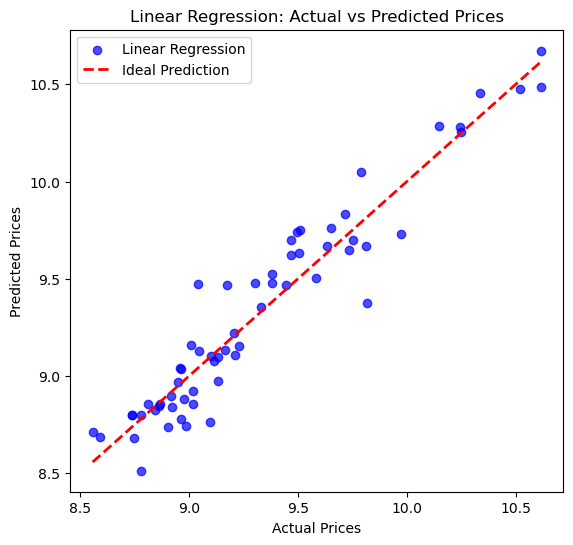

In [171]:
y_pred_lr = lr1.predict(x_test)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color="blue", label="Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.legend()

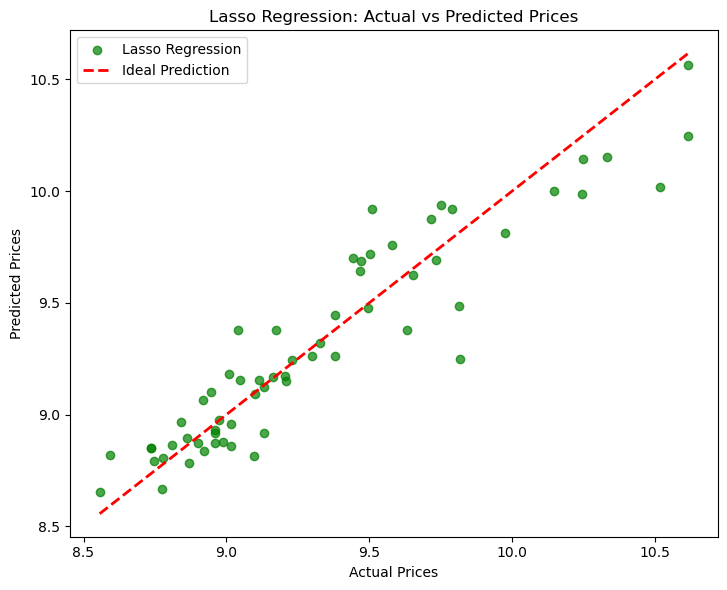

In [172]:
y_pred_lasso = las1.predict(x_test)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color="green", label="Lasso Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression: Actual vs Predicted Prices")
plt.legend()

plt.tight_layout()
plt.show()